# Step 1: Reading and Understanding the Data

In [138]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
#Supress Warnings

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
# Get the current working directory
cwd = os.getcwd()
print(cwd)

In [9]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [10]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# checking the shape of dataframe

df.shape

(730, 16)

In [12]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Identifying Missing Values

In [14]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [27]:
# Copying the dataframe into new

df_copy = df.copy()

In [28]:
# dropping the duplicates

df_copy.drop_duplicates(inplace=True)

In [30]:
# re-verifying the shape of new dataframe

df_copy.shape

(730, 16)

In [31]:
# dropping the unwanted columns
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [33]:
# Encoding/mapping the season column

df.season = df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [36]:
# Encoding/mapping the month column

df.month = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [35]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,NaN,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [37]:
# Renaming the misspelt Column Name
df.rename(columns={"mnth": "month"})

,season,yr,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,NaN,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,NaN,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,NaN,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,NaN,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,NaN,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [51]:
#Replace a NaN column with values
df['season'] = df['season'].replace(np.nan, 1)

In [45]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [38]:
# Mapping the weekday column

df.weekday = df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [68]:
# Mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,Sat,0,NaN,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,Sun,0,NaN,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,Mon,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,Tue,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,Wed,1,NaN,9.305237,11.46350,43.6957,12.522300,1600


In [52]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  0 non-null      object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 68.6+ KB


# Step 2: Visualising the Data

In [53]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

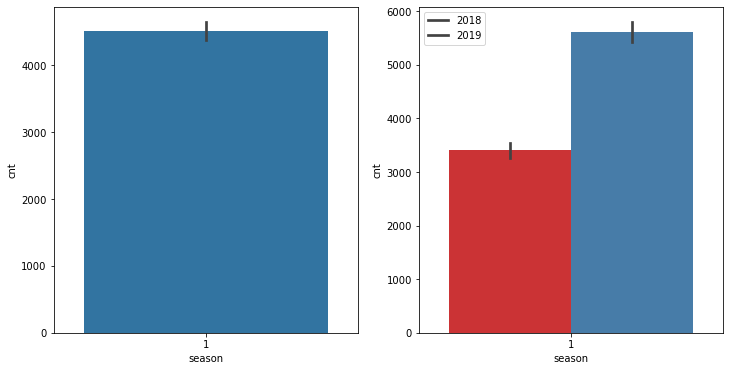

In [54]:
# plotting visualization for season column

plot_cat_columns('season')

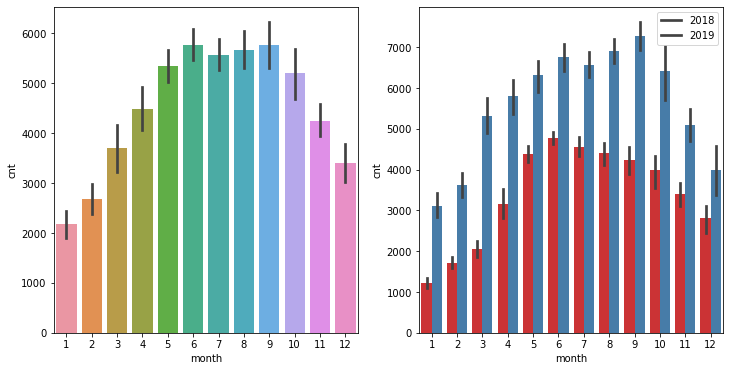

In [56]:
# plotting visualization for month column

plot_cat_columns('month')

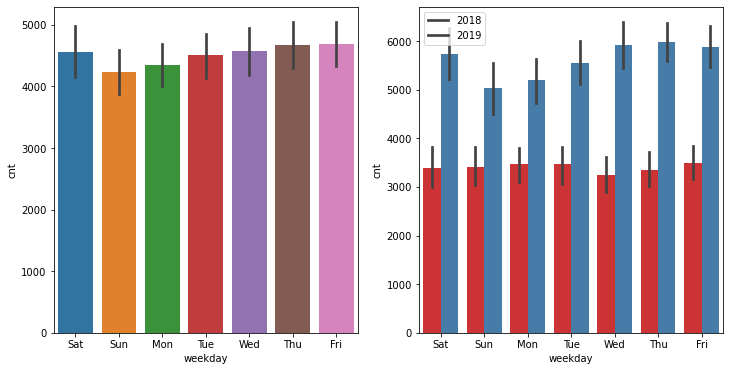

In [58]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

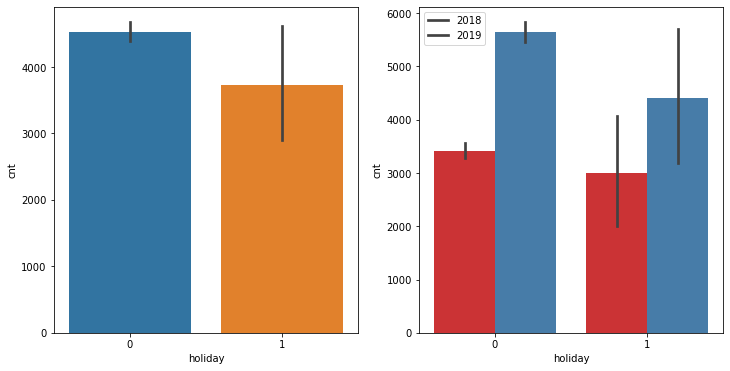

In [59]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

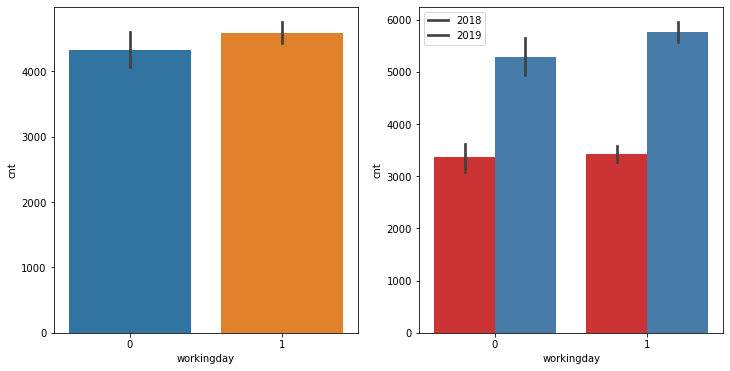

In [60]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

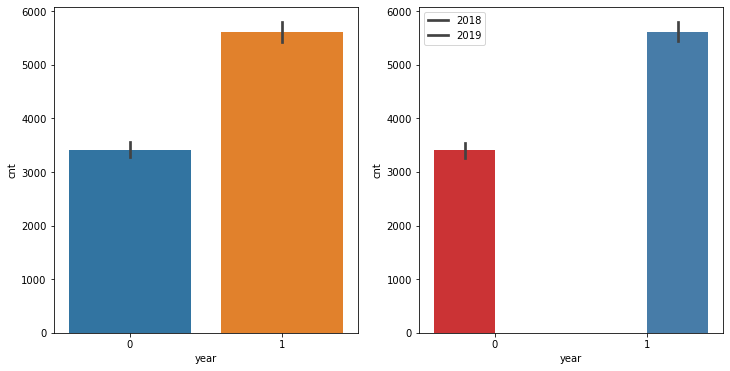

In [61]:
# plotting visualization for year column

plot_cat_columns('year')

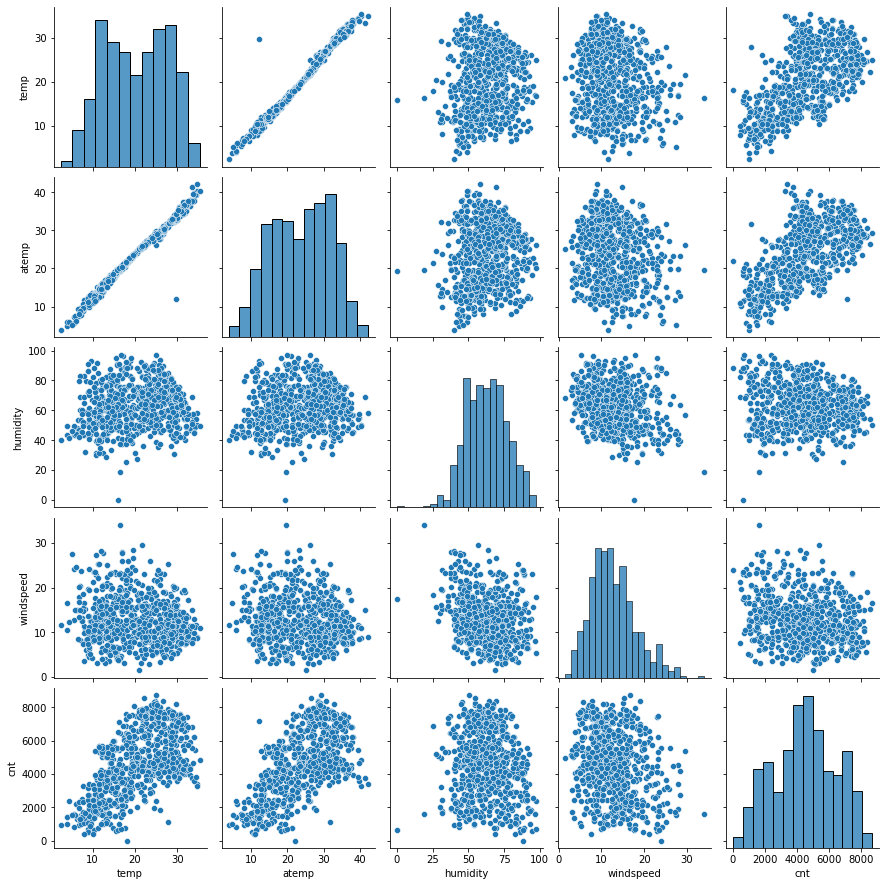

In [63]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

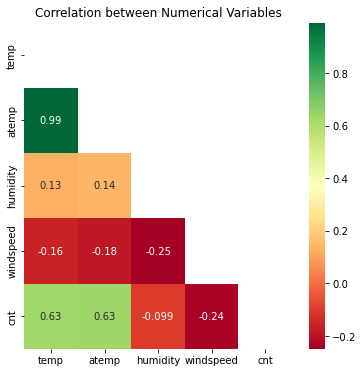

In [64]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

# Step 3: Data Preparation

In [69]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [70]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [71]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  0 non-null      object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Aug         730 non-null    uint8  
 13  Dec         730 non-null    uint8  
 14  Feb         730 non-null    uint8  
 15  Jan         730 non-null    uint8  
 16  July        730 non-null    uint8  
 17  June        730 non-null    uint8  
 18  Mar         730 non-null    uint8  
 19  May         730 non-null    u

In [77]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [78]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
# check the shape of new dataframe

df_new.shape

(730, 25)

In [80]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Aug         730 non-null    uint8  
 9   Dec         730 non-null    uint8  
 10  Feb         730 non-null    uint8  
 11  Jan         730 non-null    uint8  
 12  July        730 non-null    uint8  
 13  June        730 non-null    uint8  
 14  Mar         730 non-null    uint8  
 15  May         730 non-null    uint8  
 16  Nov         730 non-null    uint8  
 17  Oct         730 non-null    uint8  
 18  Sep         730 non-null    uint8  
 19  Mon         730 non-null    u

# Step 4: Splitting the Data into Training and Testing Sets

In [81]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [82]:
# check the shape of training datatset

df_train.shape

(510, 25)

In [83]:
# check the shape of testing datatset

df_test.shape

(220, 25)

In [84]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [85]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [87]:
# Describe the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


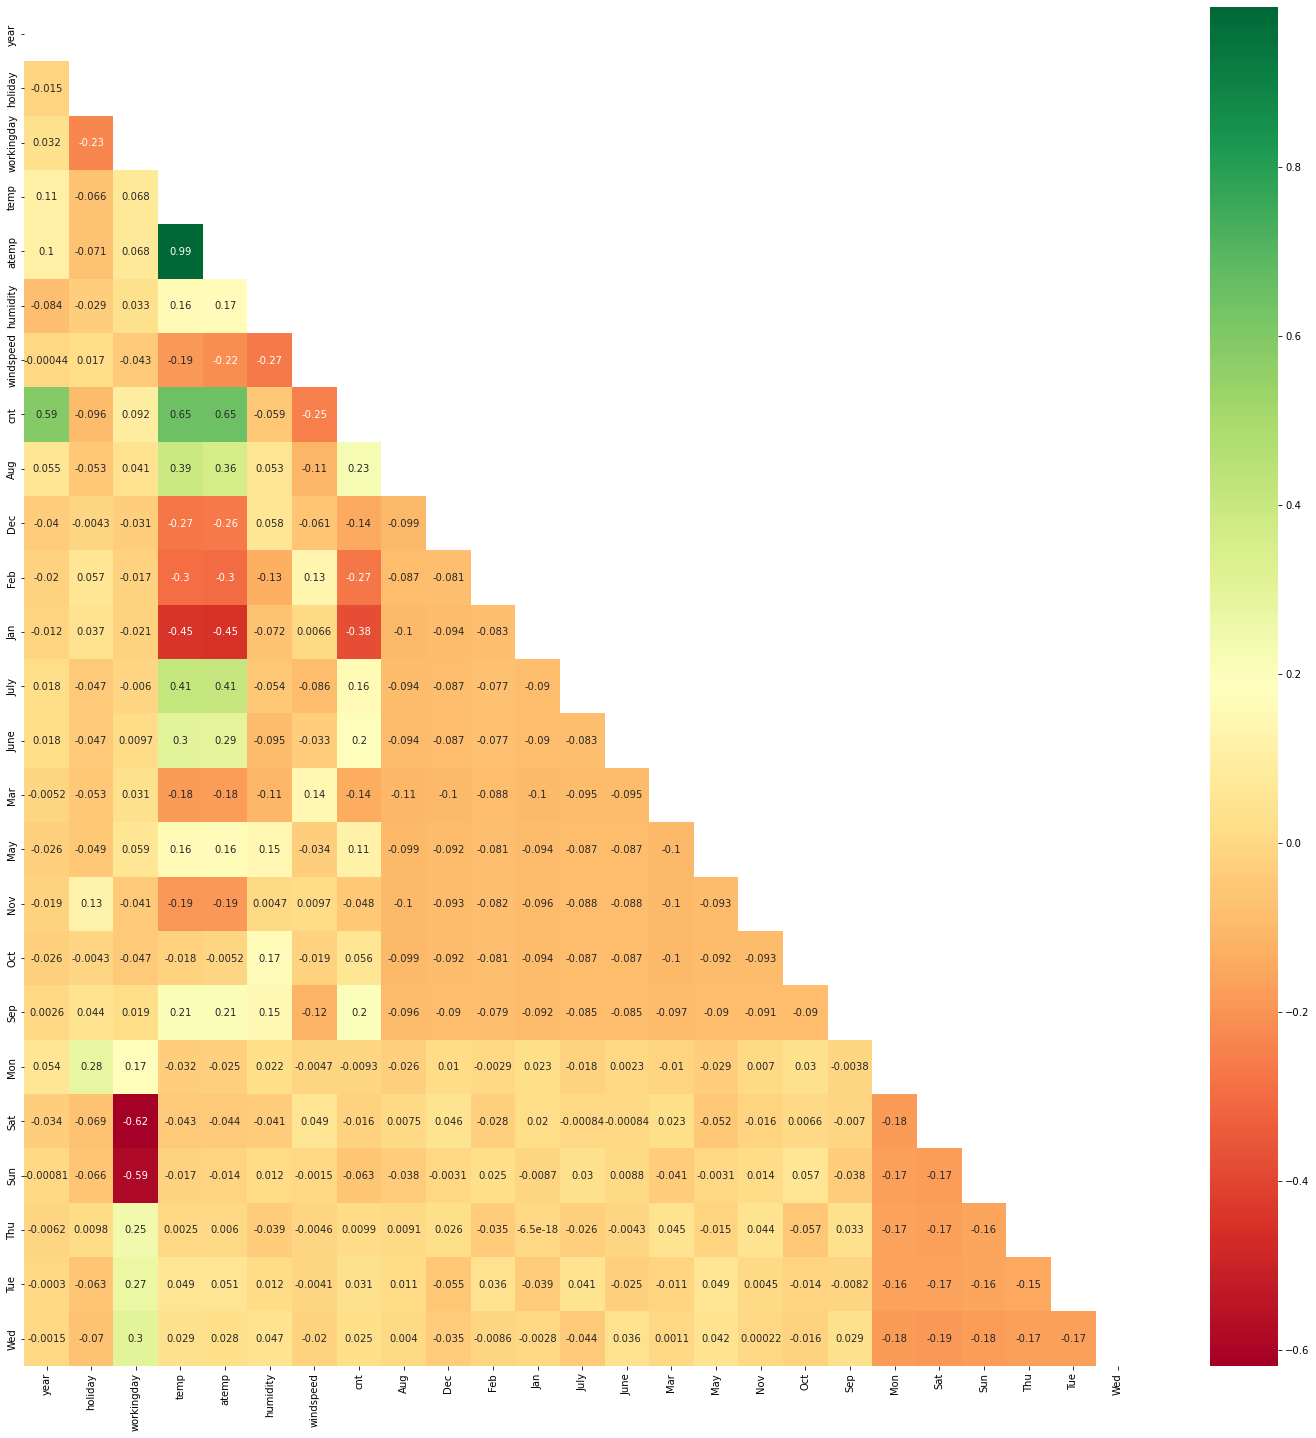

In [88]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.show()

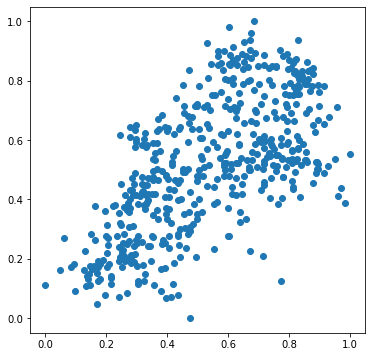

In [89]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [90]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [91]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [92]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 3),
 ('Dec', False, 10),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 9),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mon', False, 5),
 ('Sat', True, 1),
 ('Sun', False, 4),
 ('Thu', False, 6),
 ('Tue', False, 7),
 ('Wed', False, 8)]

In [93]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'Feb',
       'Jan', 'July', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Sat'],
      dtype='object')


In [94]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Dec', 'June', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [95]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [96]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [97]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,atemp,347.49
2,temp,343.94
4,humidity,13.19
5,windspeed,4.15
0,year,2.05
7,Jan,1.57
8,July,1.47
11,Nov,1.37
9,Mar,1.36
6,Feb,1.35


# Step 5: Building a linear model

In [99]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     134.8
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.13e-163
Time:                        20:56:11   Log-Likelihood:                 454.08
No. Observations:                 510   AIC:                            -876.2
Df Residuals:                     494   BIC:                            -808.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4351      0.032     13.469      0.0

In [100]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,343.78
3,atemp,338.28
4,windspeed,4.01
0,year,2.05
7,July,1.42
12,Sep,1.28
8,Mar,1.27
9,May,1.26
5,Feb,1.22
6,Jan,1.21


In [101]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     114.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          4.19e-145
Time:                        20:57:08   Log-Likelihood:                 407.14
No. Observations:                 510   AIC:                            -784.3
Df Residuals:                     495   BIC:                            -720.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2126      0.026      8.293      0.0

In [103]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['Nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,337.23
3,atemp,331.50
4,windspeed,3.80
0,year,2.05
7,July,1.41
11,Sep,1.26
9,May,1.24
8,Mar,1.23
5,Feb,1.19
6,Jan,1.18


In [104]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.06e-145
Time:                        20:58:09   Log-Likelihood:                 406.05
No. Observations:                 510   AIC:                            -784.1
Df Residuals:                     496   BIC:                            -724.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.023      9.808      0.0

In [108]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['Dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,337.23
3,atemp,331.50
4,windspeed,3.80
0,year,2.05
7,July,1.41
11,Sep,1.26
9,May,1.24
8,Mar,1.23
5,Feb,1.19
6,Jan,1.18


In [109]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.06e-145
Time:                        20:59:10   Log-Likelihood:                 406.05
No. Observations:                 510   AIC:                            -784.1
Df Residuals:                     496   BIC:                            -724.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.023      9.808      0.0

In [110]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          1.06e-145
Time:                        20:59:28   Log-Likelihood:                 406.05
No. Observations:                 510   AIC:                            -784.1
Df Residuals:                     496   BIC:                            -724.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.023      9.808      0.0

In [111]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['Jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,335.08
3,atemp,330.34
4,windspeed,3.45
0,year,2.01
6,July,1.41
10,Sep,1.26
8,May,1.24
7,Mar,1.20
11,Sat,1.18
9,Oct,1.17


In [112]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['July'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,331.87
3,atemp,329.78
4,windspeed,3.36
0,year,1.99
6,Mar,1.19
9,Sep,1.19
7,May,1.18
10,Sat,1.18
5,Feb,1.16
8,Oct,1.14


In [114]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     126.1
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          3.25e-136
Time:                        21:01:54   Log-Likelihood:                 378.41
No. Observations:                 510   AIC:                            -732.8
Df Residuals:                     498   BIC:                            -682.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1557      0.020      7.656      0.0

In [115]:
# Checking the parameters and their coefficient values
lr_6.params

const        0.155738
year         0.241298
holiday     -0.065549
temp         0.283880
atemp        0.244906
windspeed   -0.165954
Feb         -0.062523
Mar         -0.009284
May          0.038965
Oct          0.063266
Sep          0.070005
Sat          0.017622
dtype: float64

# Step 6: Residual Analysis of the train data and validation

In [116]:
X_train_lm_6

,const,year,holiday,temp,atemp,windspeed,Feb,Mar,May,Oct,Sep,Sat
576,1.0,1,0,0.815169,0.766351,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.438975,0.255342,0,1,0,0,0,1
728,1.0,1,0,0.245101,0.200348,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.391735,0.188475,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.318819,0.380981,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.824359,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.218747,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.223544,0.431816,0,0,0,0,0,1
79,1.0,0,0,0.462664,0.434043,0.529881,0,1,0,0,0,0


In [117]:
y_train_pred = lr_6.predict(X_train_lm_6)

Normality of error terms

Text(0.5, 0, 'Errors')

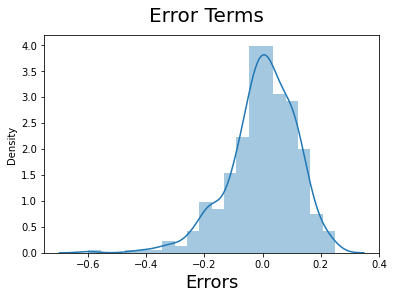

In [118]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

## Multi Colinearity

In [119]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,331.87
3,atemp,329.78
4,windspeed,3.36
0,year,1.99
6,Mar,1.19
9,Sep,1.19
7,May,1.18
10,Sat,1.18
5,Feb,1.16
8,Oct,1.14


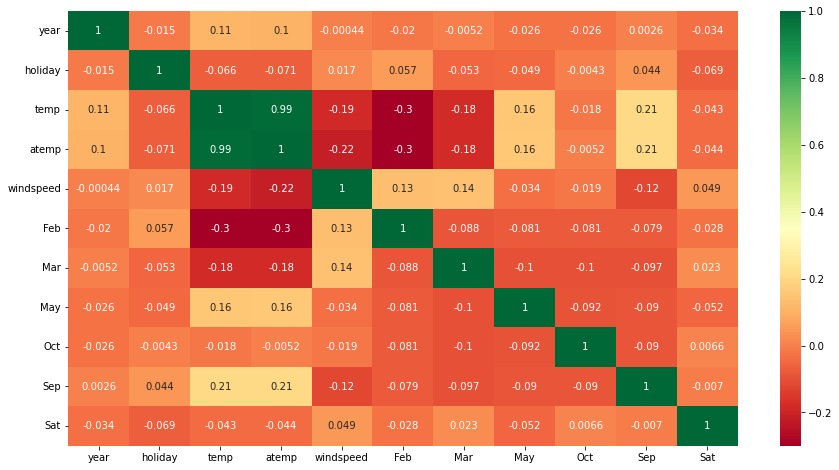

In [120]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

## Linearity

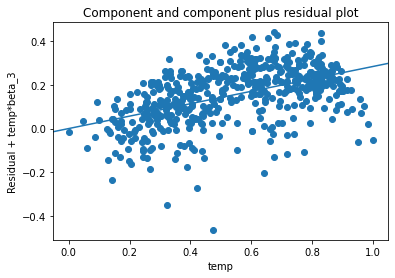

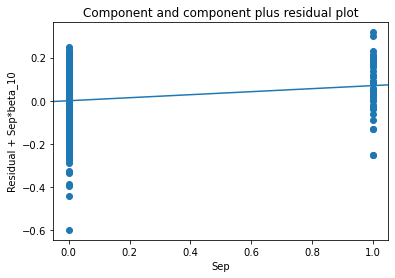

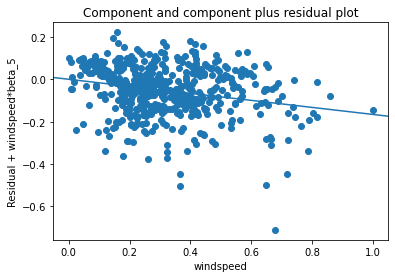

In [122]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'Sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

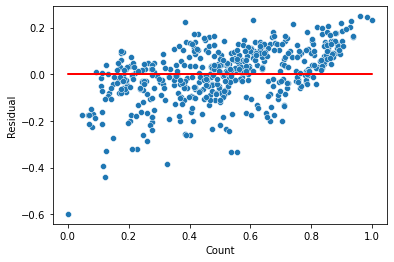

In [123]:
## Homoscedasticity
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

# Step 7: Making Predictions Using the Final Model

In [125]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,0,0,0,1,0,0


In [133]:
y_test = df_test.pop('cnt')
X_test = df_test
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [139]:
y_pred = lr_6.predict(X_test_lm_6)
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7268

# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

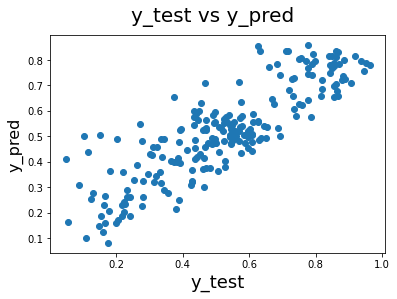

In [141]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [142]:
round(lr_6.params,4)

const        0.1557
year         0.2413
holiday     -0.0655
temp         0.2839
atemp        0.2449
windspeed   -0.1660
Feb         -0.0625
Mar         -0.0093
May          0.0390
Oct          0.0633
Sep          0.0700
Sat          0.0176
dtype: float64

In [143]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7123


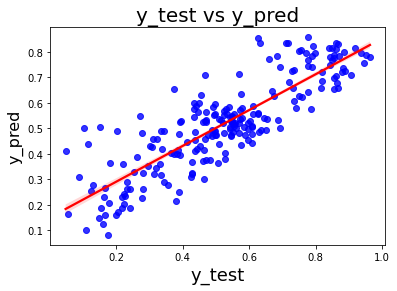

In [144]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:

Demand of bikes depend on year, holiday, temp, windspeed, Months, Light_snowrain and whether such as Misty, spring, summer and winter.